In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
import xgboost as xgb
import numpy as np
import joblib
import os


### Exploratory data analysis

In [3]:
df = pd.read_csv('../data/synthetic_dataset.csv')

In [23]:
df.head()

,driverId,days_since_last_trip,completed_deliveries_last_30_days,avg_rating_last_30_days,total_earnings_last_30_days,wallet_balance,tenure_in_days,churn
0,1,2,19,4.95,11229.81,431.56,161,0
1,2,9,14,4.64,6282.55,131.81,1167,0
2,3,14,13,4.76,7986.73,1386.16,992,0
3,4,1,19,4.79,10238.36,1744.21,675,1
4,5,0,21,4.98,8680.04,294.46,666,0


In [24]:
df.describe()

,driverId,days_since_last_trip,completed_deliveries_last_30_days,avg_rating_last_30_days,total_earnings_last_30_days,wallet_balance,tenure_in_days,churn
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,8.504200,16.757500,4.791397,8865.948650,980.687582,759.16750,0.439200
std,2886.89568,8.536256,6.801053,0.118949,3660.076964,795.030365,422.37053,0.496314
min,1.00000,0.000000,0.000000,3.980000,0.000000,0.000000,30.00000,0.000000
25%,2500.75000,2.000000,13.000000,4.730000,6647.397500,351.937500,393.00000,0.000000
50%,5000.50000,5.000000,17.000000,4.810000,8996.915000,848.660000,756.00000,0.000000
75%,7500.25000,13.000000,21.000000,4.870000,11263.625000,1419.835000,1126.00000,1.000000
max,10000.00000,34.000000,41.000000,5.000000,25498.730000,6315.240000,1499.00000,1.000000


In [5]:
df.shape

(10000, 8)

No of churned drivers in the dataset: 4392
No of not churned drivers in the dataset: 5608


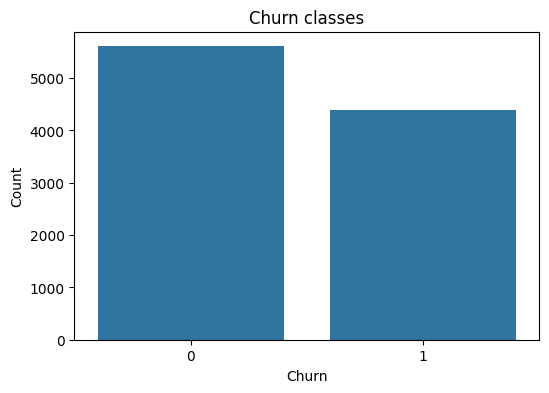

In [6]:
print(f"No of churned drivers in the dataset: {df[df['churn'] == 1].shape[0]}")
print(f"No of not churned drivers in the dataset: {df[df['churn'] == 0].shape[0]}")

#Plotting the how target variable is distributed
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df)
plt.title('Churn classes')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### Distributions of features


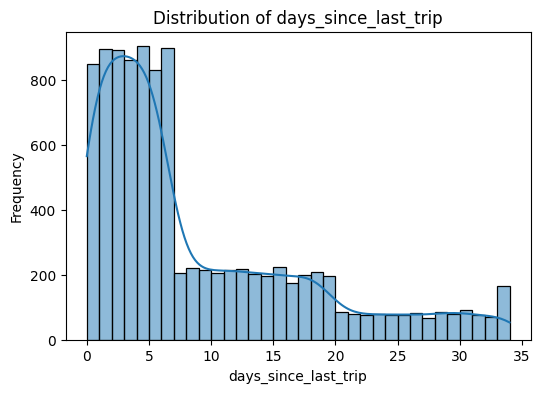

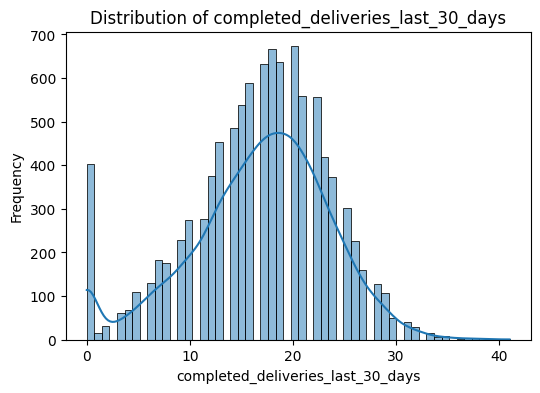

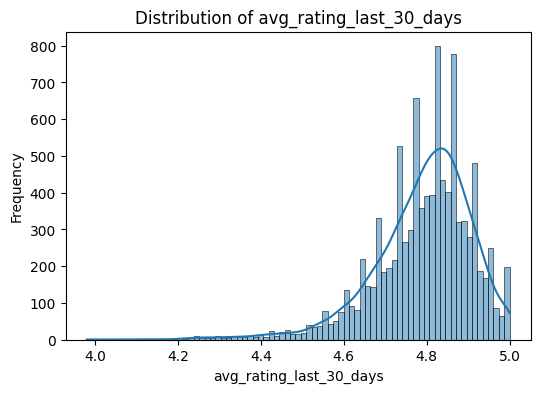

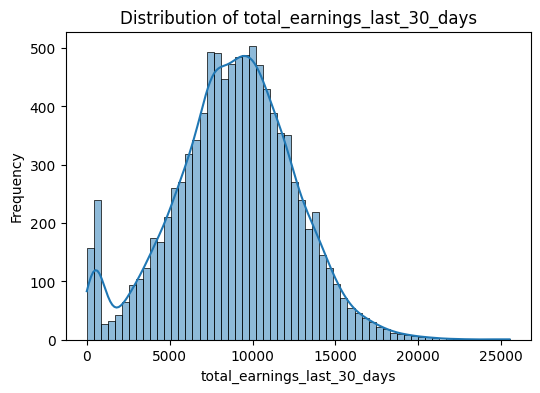

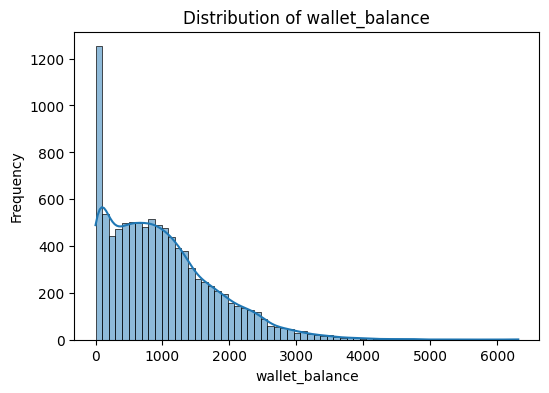

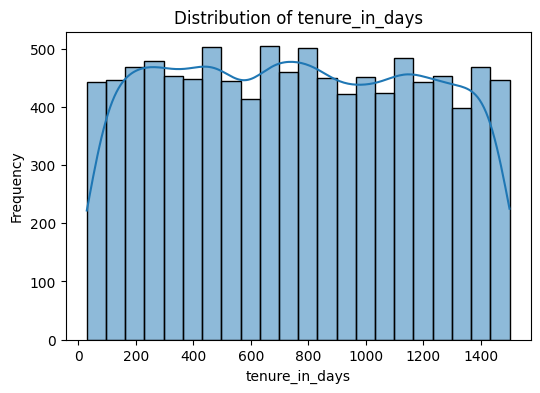

In [7]:
features = df.drop(['churn', 'driverId'], axis=1).columns.tolist()

# Plotting distributions of features
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


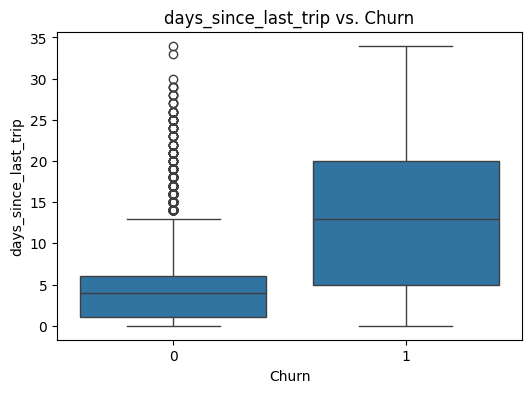

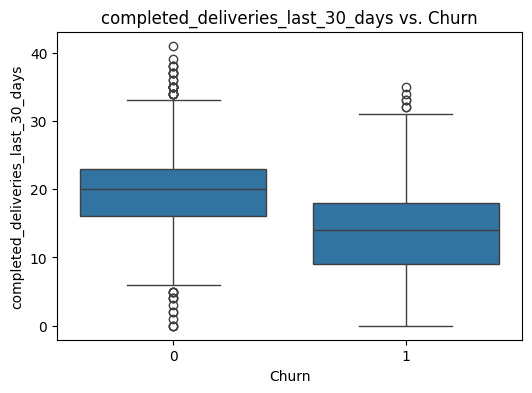

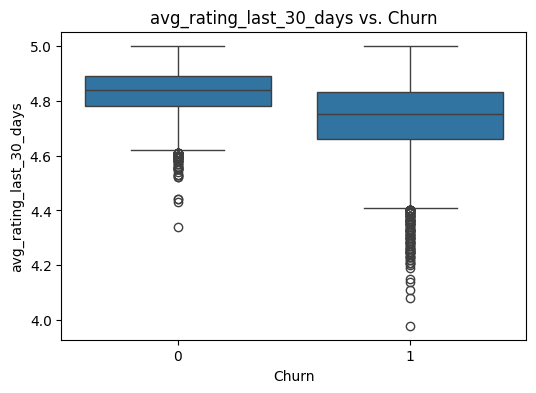

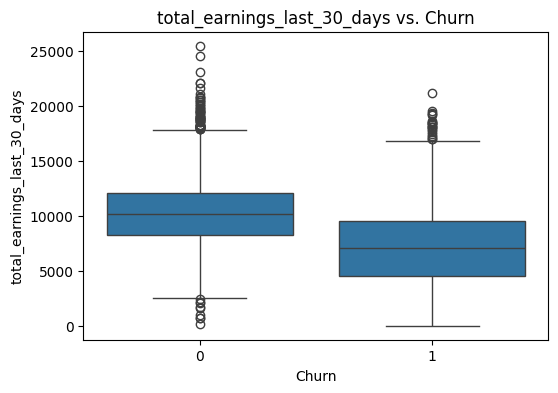

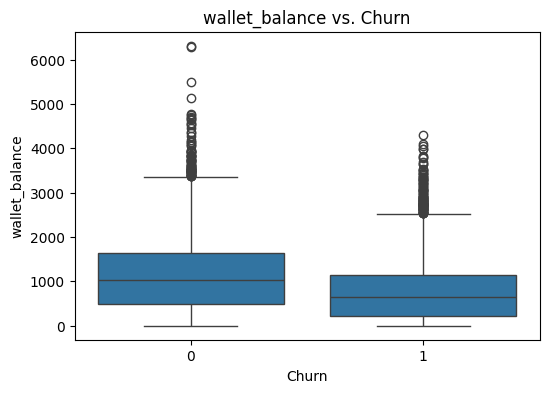

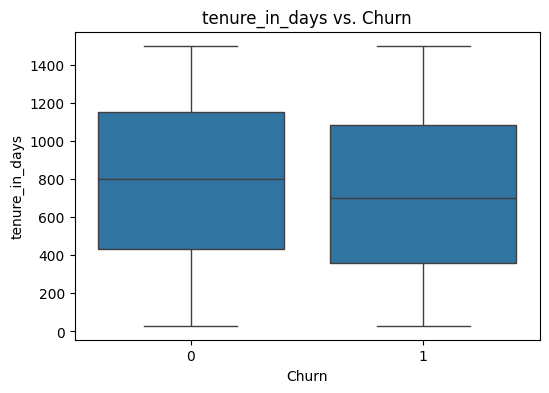

In [8]:
# Plotting boxplots for features against churn
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f'{feature} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

Text(0.5, 1.0, 'Correlation Matrix of Features')

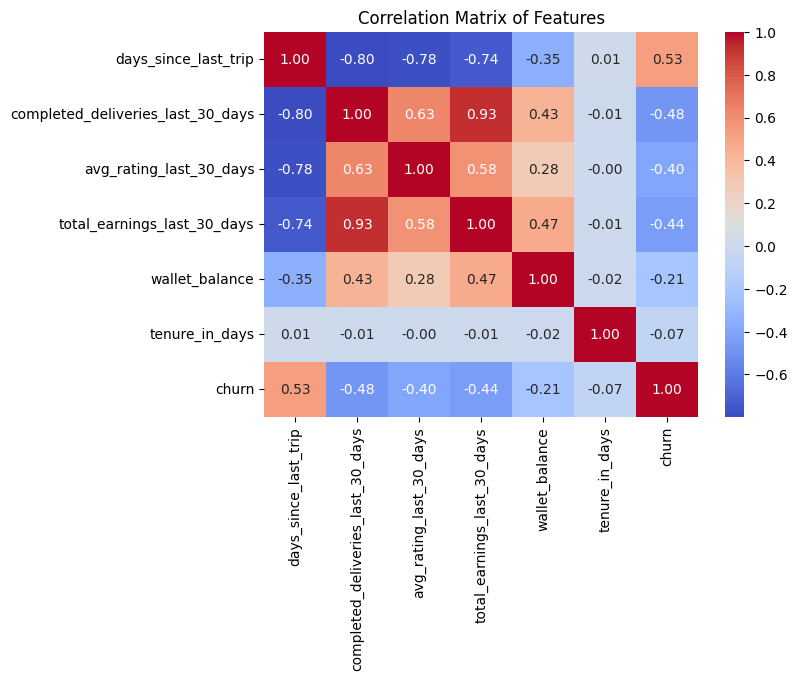

In [9]:
# Plotting correlation matrix
plt.figure(figsize=(7, 5))
correlation_matrix = df[features + ['churn']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')

### Model Training

In [5]:
# Splitting the dataset into features and target variable
X = df.drop(['churn', 'driverId'], axis=1)
y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (8000, 6)
Testing set shape: (2000, 6)


Scaling of features for logistic regression. 
Since logistic regression can be affected by the varying magnitudes of features in the dataset standard scaler is used.

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic regression

In [12]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)
pred_logistic = logistic_regression_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, pred_logistic):.4f}")
print("Classification Report:")
print(classification_report(y_test, pred_logistic))

Accuracy: 0.7350
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1122
           1       0.77      0.56      0.65       878

    accuracy                           0.73      2000
   macro avg       0.74      0.72      0.72      2000
weighted avg       0.74      0.73      0.73      2000



Decision Tree


In [13]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
pred_decision_tree = decision_tree_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred_decision_tree):.4f}")
print("Classification Report:")
print(classification_report(y_test, pred_decision_tree))

Accuracy: 0.6480
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1122
           1       0.60      0.60      0.60       878

    accuracy                           0.65      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.65      0.65      0.65      2000



Random Forest


In [14]:
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)
pred_random_forest = random_forest_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred_random_forest):.4f}")
print("Classification Report:")
print(classification_report(y_test, pred_random_forest))

Accuracy: 0.7275
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      1122
           1       0.75      0.56      0.64       878

    accuracy                           0.73      2000
   macro avg       0.73      0.71      0.71      2000
weighted avg       0.73      0.73      0.72      2000



XGBoost


In [15]:
xgboost_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
pred_xgboost = xgboost_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred_xgboost):.4f}")
print("Classification Report:")
print(classification_report(y_test, pred_xgboost))

f:\Software Project Implementation\Quicky_Admin_Churn_Prediction\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [17:51:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7045
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.76      1122
           1       0.70      0.56      0.63       878

    accuracy                           0.70      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.70      0.70      2000



Tuning the logistic regression


Fitting 5 folds for each of 35 candidates, totalling 175 fits
Classification Report for Tuned Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      1122
           1       0.77      0.57      0.65       878

    accuracy                           0.74      2000
   macro avg       0.75      0.72      0.72      2000
weighted avg       0.74      0.74      0.73      2000



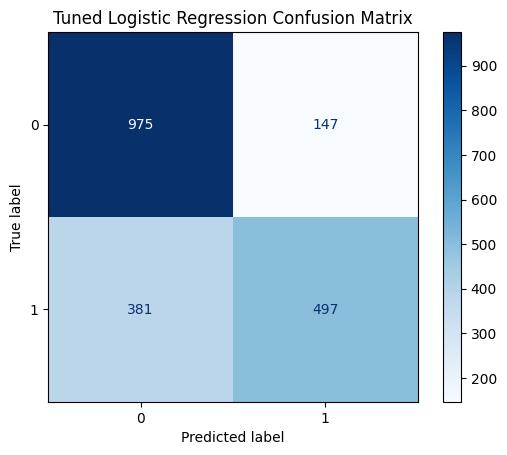

In [28]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': np.logspace(-3, 3, 7) 
    },
    {
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'C': np.logspace(-3, 3, 7)
    }
]

grid_search = GridSearchCV(estimator=log_reg, 
                           param_grid=param_grid, 
                           scoring='f1',
                           cv=5, 
                           verbose=1,
                           n_jobs=-1) 


grid_search.fit(X_train_scaled, y_train)

tuned_logistic_regression = grid_search.best_estimator_

pred_tuned_log_reg = tuned_logistic_regression.predict(X_test_scaled)

print("Classification Report for Tuned Logistic Regression")
print(classification_report(y_test, pred_tuned_log_reg))

# Confusion matrix for tuned logistic regression
ConfusionMatrixDisplay.from_estimator(tuned_logistic_regression, 
                                      X_test_scaled, 
                                      y_test, 
                                      cmap='Blues')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.show()

Tuning Decision tree model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Classification Report for Tuned Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.87      0.78      1122
           1       0.77      0.56      0.65       878

    accuracy                           0.73      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.74      0.73      0.72      2000



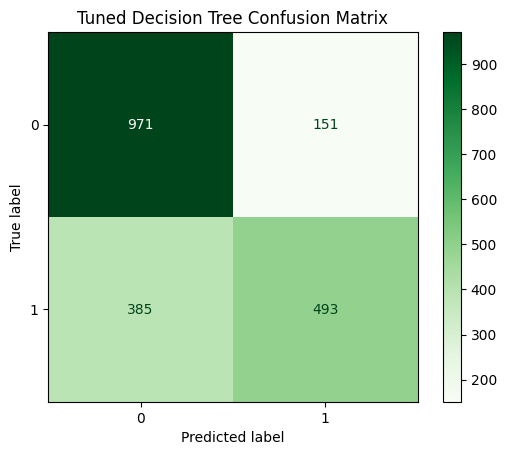

In [29]:

dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_clf, 
                           param_grid=param_grid, 
                           scoring='f1',
                           cv=5, 
                           verbose=1,
                           n_jobs=-1) 


grid_search.fit(X_train, y_train)

tuned_dt_model = grid_search.best_estimator_

y_pred_tuned_dt = tuned_dt_model.predict(X_test)

print("Classification Report for Tuned Decision Tree")
print(classification_report(y_test, y_pred_tuned_dt))

# Confusion matrix for tuned decision tree
ConfusionMatrixDisplay.from_estimator(tuned_dt_model, 
                                      X_test, 
                                      y_test, 
                                      cmap='Greens')
plt.title('Tuned Decision Tree Confusion Matrix')
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classification Report for Tuned Random Forest
              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1122
           1       0.75      0.60      0.66       878

    accuracy                           0.73      2000
   macro avg       0.74      0.72      0.72      2000
weighted avg       0.74      0.73      0.73      2000



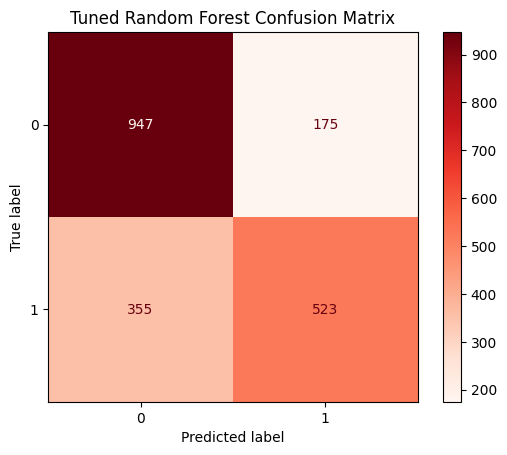

In [30]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],       
    'max_depth': [5, 10, None],         
    'min_samples_leaf': [1, 2, 4],      
    'class_weight': [None, 'balanced']  
}

grid_search_rf = GridSearchCV(estimator=rf_clf, 
                              param_grid=param_grid, 
                              scoring='f1',
                              cv=5, 
                              verbose=1,
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

tuned_rf_model = grid_search_rf.best_estimator_

y_pred_tuned_rf = tuned_rf_model.predict(X_test)

print("Classification Report for Tuned Random Forest")
print(classification_report(y_test, y_pred_tuned_rf))

# Confusion matrix for tuned random forest
ConfusionMatrixDisplay.from_estimator(tuned_rf_model, X_test, y_test, cmap='Reds')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

Fitting 5 folds for each of 32 candidates, totalling 160 fits


f:\Software Project Implementation\Quicky_Admin_Churn_Prediction\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [10:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for Tuned XGBoost
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1122
           1       0.73      0.61      0.67       878

    accuracy                           0.73      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.73      0.73      2000



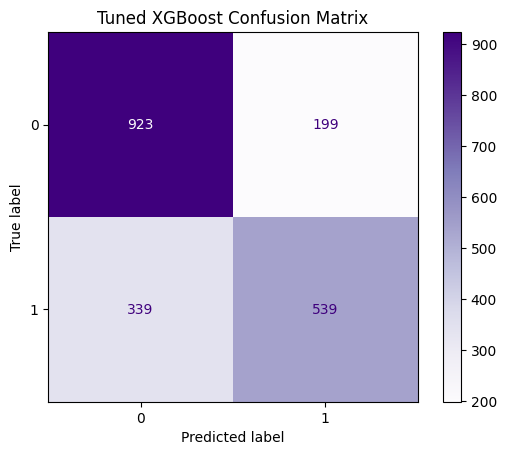

In [6]:
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# 2. Calculate the scale_pos_weight
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, scale_pos_weight] 
}

grid_search_xgb = GridSearchCV(estimator=xgb_clf, 
                               param_grid=param_grid_xgb, 
                               scoring='f1',
                               cv=5, 
                               verbose=1,
                               n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

tuned_xgb_model = grid_search_xgb.best_estimator_

y_pred_tuned_xgb = tuned_xgb_model.predict(X_test)

print("Classification Report for Tuned XGBoost")
print(classification_report(y_test, y_pred_tuned_xgb))

# Confusion matrix for tuned XGBoost
ConfusionMatrixDisplay.from_estimator(tuned_xgb_model, X_test, y_test, cmap='Purples')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

According to the Bussiness problem, main task is to retain drivers who are likely to churn, but still best model has a recall of 0.61. which means that 39% of churned drivers are still not being identified and flagged by the model. To address this, my approach is to adjust the probability threshold used to classify drivers as churned in order to increase recall and identify more at-risk drivers and retain more drivers within the platform by incentivizing them.

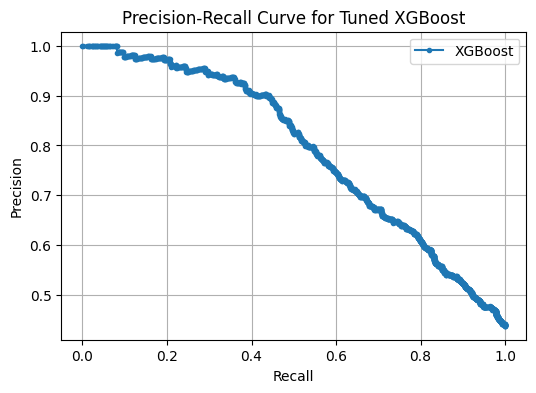

In [8]:
# Taking the current best performing model
best_model = tuned_xgb_model

# Get the prediction probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
  
# Plot the curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Tuned XGBoost')



plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Tweaking with different thresholds for y_churn = 1 to increase recall

pred_on_different_threshholds = (y_probs >= 0.41).astype(int)
print(classification_report(y_test, pred_on_different_threshholds))


              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1122
           1       0.67      0.71      0.69       878

    accuracy                           0.72      2000
   macro avg       0.71      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



The threshold is set to 0.41, meaning that if a driver receives a churn probability of 41% or higher, the model flags them as a churned driver. By lowering the threshold, I was able to increase the recall to 71%, while trading off some precision.

Exporting the best model to be used in the prediction


In [27]:
output_dir = '../models'
os.makedirs(output_dir, exist_ok=True) # Create the directory if it doesn't exist
file_path = os.path.join(output_dir, 'tuned_XGBoost.joblib')


joblib.dump(best_model, file_path)

print(f"Model saved successfully to: {file_path}")

Model saved successfully to: ../models\tuned_XGBoost.joblib


In [10]:
# using random values to test the model
record = {
    'days_since_last_trip': 0,
    'completed_deliveries_last_30_days': 3,
    'avg_rating_last_30_days': 4.9,
    'total_earnings_last_30_days': 5290.0,
    'wallet_balance': 900.0,
    'tenure_in_days': 0
}

df_record = pd.DataFrame([record])
best_model.predict_proba(df_record)

array([[0.67126226, 0.32873777]], dtype=float32)